In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split

### Open dataset

In [193]:
file = "UCI_Credit_Card.csv"
cc_df = pd.read_csv(file)

#### Validate successfully loaded dataset

In [88]:
cc_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Dataset analysis

#### Dataset description

In [89]:
cc_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#### Variables type information

In [90]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

#### Empty values

In [91]:
cc_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [7]:
cc_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#### Separate numerical and categorical values

In [100]:
categorical_cols = ['SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3',
'PAY_4','PAY_5','PAY_6']
numerical_cols = cc_df.drop(['ID','SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2',
'PAY_3','PAY_4','PAY_5','PAY_6','default.payment.next.month'], axis=1)

#### Analize numerical values

In [101]:
print('Describing numerical columns')
print(cc_df[numerical_cols.columns].describe())

Describing numerical columns
            LIMIT_BAL           AGE      BILL_AMT1      BILL_AMT2  \
count    30000.000000  30000.000000   30000.000000   30000.000000   
mean    167484.322667     35.485500   51223.330900   49179.075167   
std     129747.661567      9.217904   73635.860576   71173.768783   
min      10000.000000     21.000000 -165580.000000  -69777.000000   
25%      50000.000000     28.000000    3558.750000    2984.750000   
50%     140000.000000     34.000000   22381.500000   21200.000000   
75%     240000.000000     41.000000   67091.000000   64006.250000   
max    1000000.000000     79.000000  964511.000000  983931.000000   

          BILL_AMT3      BILL_AMT4      BILL_AMT5      BILL_AMT6  \
count  3.000000e+04   30000.000000   30000.000000   30000.000000   
mean   4.701315e+04   43262.948967   40311.400967   38871.760400   
std    6.934939e+04   64332.856134   60797.155770   59554.107537   
min   -1.572640e+05 -170000.000000  -81334.000000 -339603.000000   
25%    2.

In [99]:
target = cc_df.LIMIT_BAL.values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=20000, Count=1976, Percentage=6.587%
Class=120000, Count=726, Percentage=2.420%
Class=90000, Count=651, Percentage=2.170%
Class=50000, Count=3365, Percentage=11.217%
Class=500000, Count=722, Percentage=2.407%
Class=100000, Count=1048, Percentage=3.493%
Class=140000, Count=749, Percentage=2.497%
Class=200000, Count=1528, Percentage=5.093%
Class=260000, Count=521, Percentage=1.737%
Class=630000, Count=7, Percentage=0.023%
Class=70000, Count=731, Percentage=2.437%
Class=250000, Count=350, Percentage=1.167%
Class=320000, Count=312, Percentage=1.040%
Class=360000, Count=881, Percentage=2.937%
Class=180000, Count=995, Percentage=3.317%
Class=130000, Count=729, Percentage=2.430%
Class=450000, Count=161, Percentage=0.537%
Class=60000, Count=825, Percentage=2.750%
Class=230000, Count=737, Percentage=2.457%
Class=160000, Count=694, Percentage=2.313%
Class=280000, Count=493, Percentage=1.643%
Class=10000, Count=493, Percentage=1.643%
Class=40000, Count=230, Percentage=0.767%
Class=210000, C

In [103]:
target = cc_df.AGE.values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=24, Count=1127, Percentage=3.757%
Class=26, Count=1256, Percentage=4.187%
Class=34, Count=1162, Percentage=3.873%
Class=37, Count=1041, Percentage=3.470%
Class=57, Count=122, Percentage=0.407%
Class=29, Count=1605, Percentage=5.350%
Class=23, Count=931, Percentage=3.103%
Class=28, Count=1409, Percentage=4.697%
Class=35, Count=1113, Percentage=3.710%
Class=51, Count=340, Percentage=1.133%
Class=41, Count=824, Percentage=2.747%
Class=30, Count=1395, Percentage=4.650%
Class=49, Count=452, Percentage=1.507%
Class=39, Count=954, Percentage=3.180%
Class=40, Count=870, Percentage=2.900%
Class=27, Count=1477, Percentage=4.923%
Class=47, Count=501, Percentage=1.670%
Class=33, Count=1146, Percentage=3.820%
Class=32, Count=1158, Percentage=3.860%
Class=54, Count=247, Percentage=0.823%
Class=58, Count=122, Percentage=0.407%
Class=22, Count=560, Percentage=1.867%
Class=25, Count=1186, Percentage=3.953%
Class=31, Count=1217, Percentage=4.057%
Class=46, Count=570, Percentage=1.900%
Class=42, Co

In [104]:
target = cc_df.BILL_AMT1.values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=3913, Count=1, Percentage=0.003%
Class=2682, Count=1, Percentage=0.003%
Class=29239, Count=1, Percentage=0.003%
Class=46990, Count=1, Percentage=0.003%
Class=8617, Count=1, Percentage=0.003%
Class=64400, Count=1, Percentage=0.003%
Class=367965, Count=1, Percentage=0.003%
Class=11876, Count=2, Percentage=0.007%
Class=11285, Count=2, Percentage=0.007%
Class=0, Count=2008, Percentage=6.693%
Class=11073, Count=1, Percentage=0.003%
Class=12261, Count=1, Percentage=0.003%
Class=12137, Count=1, Percentage=0.003%
Class=65802, Count=1, Percentage=0.003%
Class=70887, Count=1, Percentage=0.003%
Class=50614, Count=2, Percentage=0.007%
Class=15376, Count=1, Percentage=0.003%
Class=253286, Count=1, Percentage=0.003%
Class=38358, Count=1, Percentage=0.003%
Class=316, Count=63, Percentage=0.210%
Class=41087, Count=2, Percentage=0.007%
Class=5512, Count=1, Percentage=0.003%
Class=4744, Count=1, Percentage=0.003%
Class=47620, Count=1, Percentage=0.003%
Class=-109, Count=2, Percentage=0.007%
Class=

In [105]:
target = cc_df.PAY_AMT1.values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=0, Count=5249, Percentage=17.497%
Class=1518, Count=7, Percentage=0.023%
Class=2000, Count=1363, Percentage=4.543%
Class=2500, Count=298, Percentage=0.993%
Class=55000, Count=5, Percentage=0.017%
Class=380, Count=13, Percentage=0.043%
Class=3329, Count=3, Percentage=0.010%
Class=2306, Count=7, Percentage=0.023%
Class=21818, Count=1, Percentage=0.003%
Class=1000, Count=365, Percentage=1.217%
Class=3200, Count=84, Percentage=0.280%
Class=3000, Count=891, Percentage=2.970%
Class=10358, Count=1, Percentage=0.003%
Class=316, Count=62, Percentage=0.207%
Class=2007, Count=18, Percentage=0.060%
Class=19428, Count=1, Percentage=0.003%
Class=5757, Count=3, Percentage=0.010%
Class=1973, Count=4, Percentage=0.013%
Class=1300, Count=184, Percentage=0.613%
Class=3415, Count=2, Percentage=0.007%
Class=1500, Count=507, Percentage=1.690%
Class=17270, Count=1, Percentage=0.003%
Class=1718, Count=3, Percentage=0.010%
Class=3023, Count=7, Percentage=0.023%
Class=4152, Count=1, Percentage=0.003%
Clas

#### Analyze categorical variables

In [102]:
print('Describing categorical columns')
print(cc_df[categorical_cols].describe())

Describing categorical columns
                SEX     EDUCATION      MARRIAGE           AGE         PAY_0  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean       1.603733      1.853133      1.551867     35.485500     -0.016700   
std        0.489129      0.790349      0.521970      9.217904      1.123802   
min        1.000000      0.000000      0.000000     21.000000     -2.000000   
25%        1.000000      1.000000      1.000000     28.000000     -1.000000   
50%        2.000000      2.000000      2.000000     34.000000      0.000000   
75%        2.000000      2.000000      2.000000     41.000000      0.000000   
max        2.000000      6.000000      3.000000     79.000000      8.000000   

              PAY_2         PAY_3         PAY_4         PAY_5         PAY_6  
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000  
mean      -0.133767     -0.166200     -0.220667     -0.266200     -0.291100  
std        1.197186    

In [10]:
target = cc_df['SEX'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=2, Count=18112, Percentage=60.373%
Class=1, Count=11888, Percentage=39.627%


In [11]:
target = cc_df['EDUCATION'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=2, Count=14030, Percentage=46.767%
Class=1, Count=10585, Percentage=35.283%
Class=3, Count=4917, Percentage=16.390%
Class=5, Count=280, Percentage=0.933%
Class=4, Count=123, Percentage=0.410%
Class=6, Count=51, Percentage=0.170%
Class=0, Count=14, Percentage=0.047%


In [12]:
target = cc_df['MARRIAGE'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1, Count=13659, Percentage=45.530%
Class=2, Count=15964, Percentage=53.213%
Class=3, Count=323, Percentage=1.077%
Class=0, Count=54, Percentage=0.180%


In [13]:
target = cc_df['PAY_0'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=2, Count=2667, Percentage=8.890%
Class=-1, Count=5686, Percentage=18.953%
Class=0, Count=14737, Percentage=49.123%
Class=-2, Count=2759, Percentage=9.197%
Class=1, Count=3688, Percentage=12.293%
Class=3, Count=322, Percentage=1.073%
Class=4, Count=76, Percentage=0.253%
Class=8, Count=19, Percentage=0.063%
Class=7, Count=9, Percentage=0.030%
Class=5, Count=26, Percentage=0.087%
Class=6, Count=11, Percentage=0.037%


In [107]:
target = cc_df['PAY_2'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=2, Count=3927, Percentage=13.090%
Class=0, Count=15730, Percentage=52.433%
Class=-1, Count=6050, Percentage=20.167%
Class=-2, Count=3782, Percentage=12.607%
Class=3, Count=326, Percentage=1.087%
Class=5, Count=25, Percentage=0.083%
Class=7, Count=20, Percentage=0.067%
Class=4, Count=99, Percentage=0.330%
Class=1, Count=28, Percentage=0.093%
Class=6, Count=12, Percentage=0.040%
Class=8, Count=1, Percentage=0.003%


In [108]:
target = cc_df['PAY_3'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=-1, Count=5938, Percentage=19.793%
Class=0, Count=15764, Percentage=52.547%
Class=2, Count=3819, Percentage=12.730%
Class=-2, Count=4085, Percentage=13.617%
Class=3, Count=240, Percentage=0.800%
Class=4, Count=76, Percentage=0.253%
Class=6, Count=23, Percentage=0.077%
Class=7, Count=27, Percentage=0.090%
Class=1, Count=4, Percentage=0.013%
Class=5, Count=21, Percentage=0.070%
Class=8, Count=3, Percentage=0.010%


#### Output variable

In [14]:
target = cc_df['default.payment.next.month'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1, Count=6636, Percentage=22.120%
Class=0, Count=23364, Percentage=77.880%


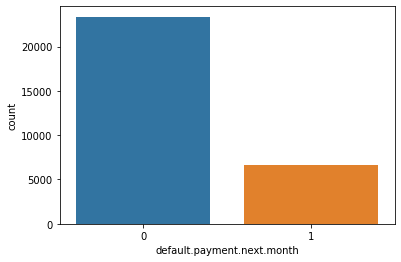

In [15]:
sns.countplot(x='default.payment.next.month', data=cc_df)
plt.show()

### Graphical analysis

#### Output variable

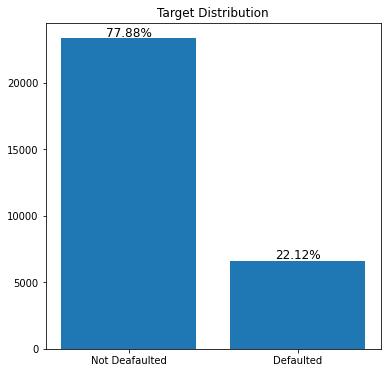

In [109]:
# Percentage of people who have Defaulted and not defaulted
target_count = cc_df.groupby('default.payment.next.month').size().reset_index(name='counts')

plt.figure(figsize=(6,6))
plt.bar(target_count['default.payment.next.month'], target_count.counts)
plt.xticks([0,1], labels=["Not Deafaulted", "Defaulted"])
plt.title("Target Distribution")

total = len(cc_df['default.payment.next.month'])
not_def = len(cc_df[cc_df['default.payment.next.month']==0])/total *100
yes_def = len(cc_df[cc_df['default.payment.next.month']==1])/total *100

plt.text(x=0, y=not_def,s=str("%.2f"%not_def+'%'), fontsize=12, position=(0,len(cc_df[cc_df['default.payment.next.month']==0])*1.006), horizontalalignment='center')
plt.text(x=1, y=yes_def,s=str("%.2f"%yes_def+'%'), fontsize=12, position=(1,len(cc_df[cc_df['default.payment.next.month']==1])*1.02), horizontalalignment='center')

plt.show()

#### Analysis of categorical values

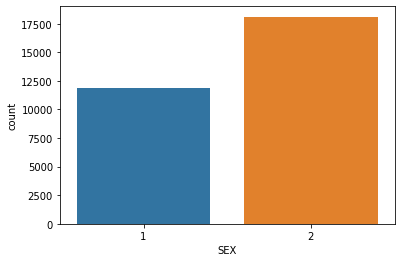

In [19]:
sns.countplot(x='SEX', data=cc_df)
plt.show()

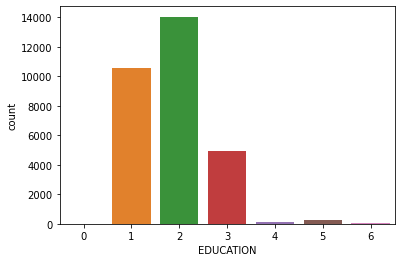

In [20]:
sns.countplot(x='EDUCATION', data=cc_df)
plt.show()

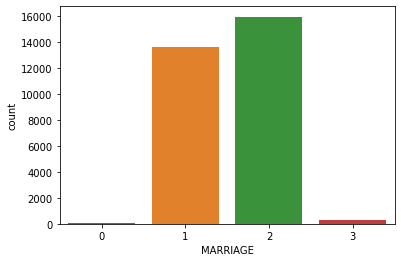

In [21]:
sns.countplot(x='MARRIAGE', data=cc_df)
plt.show()

<Figure size 432x432 with 0 Axes>

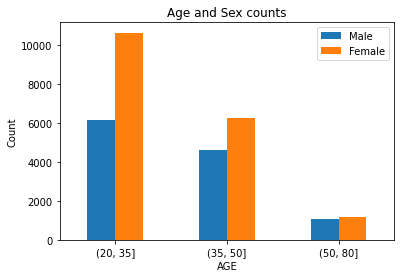

In [22]:
cc_df['AGE'] = pd.cut(cc_df.AGE, bins=[20,35,50,80])

target_count = cc_df.groupby(['AGE','SEX']).AGE.count().unstack()

# print(target_count)
plt.figure(figsize=(6,6))
target_count.plot(kind='bar', stacked=False)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(['Male', 'Female'])
plt.title("Age and Sex counts")
plt.show()

<Figure size 432x432 with 0 Axes>

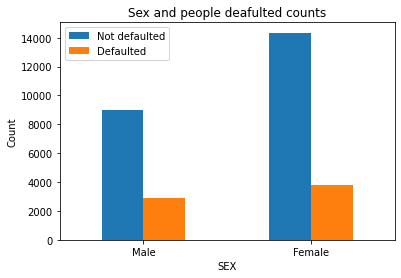

In [110]:
target_count = cc_df.groupby(['SEX','default.payment.next.month']).SEX.count().unstack()

# print(target_count)
plt.figure(figsize=(6,6))
target_count.plot(kind='bar', stacked=False)
plt.xticks([0,1],labels=['Male','Female'],rotation=0)
plt.ylabel('Count')
plt.legend(['Not defaulted', 'Defaulted'])
plt.title("Sex and people deafulted counts")
plt.show()

<Figure size 432x432 with 0 Axes>

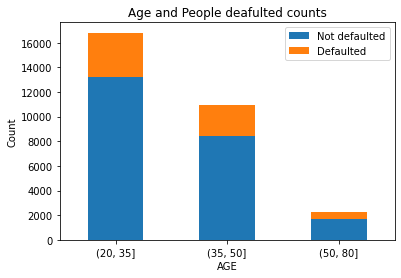

In [25]:
target_count = cc_df.groupby(['AGE','default.payment.next.month']).AGE.count().unstack()

# print(target_count)
plt.figure(figsize=(6,6))
target_count.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(['Not defaulted', 'Defaulted'])
plt.title("Age and People deafulted counts")
plt.show()

<Figure size 432x432 with 0 Axes>

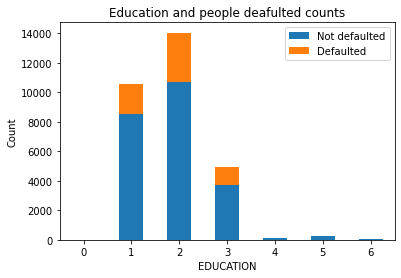

In [112]:
target_count = cc_df.groupby(['EDUCATION','default.payment.next.month']).AGE.count().unstack()

# print(target_count)
plt.figure(figsize=(6,6))
target_count.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(['Not defaulted', 'Defaulted'])
plt.title("Education and people deafulted counts")
plt.show()

<Figure size 432x432 with 0 Axes>

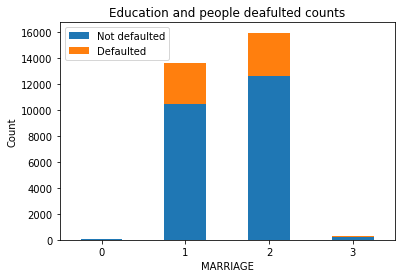

In [113]:
target_count = cc_df.groupby(['MARRIAGE','default.payment.next.month']).AGE.count().unstack()

# print(target_count)
plt.figure(figsize=(6,6))
target_count.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(['Not defaulted', 'Defaulted'])
plt.title("Education and people deafulted counts")
plt.show()

#### Analysis of numerical variables

##### Box-plot 

In [114]:
'''
numerical_cols.plot(kind='box')
plt.figsize=(20,10)
plt.xticks(rotation=90)
plt.show()
'''

"\nnumerical_cols.plot(kind='box')\nplt.figsize=(20,10)\nplt.xticks(rotation=90)\nplt.show()\n"

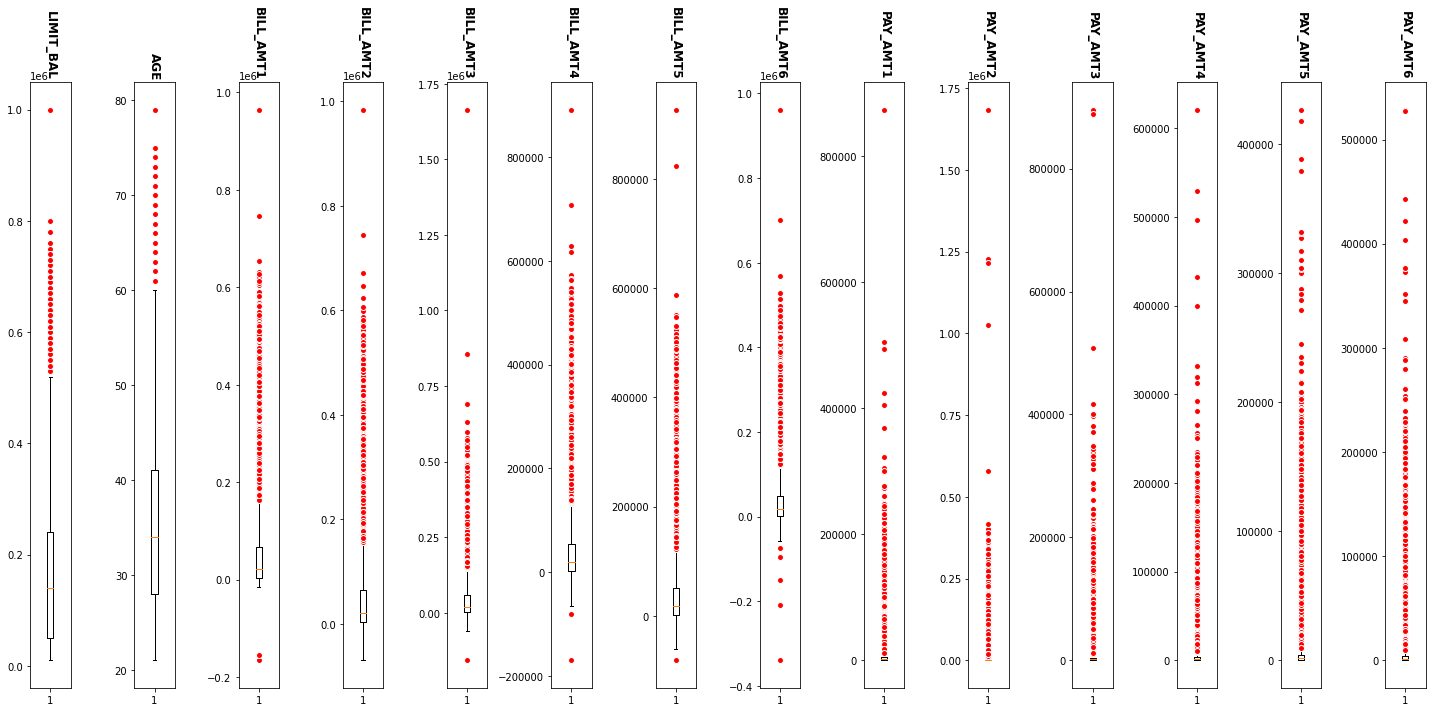

In [119]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(numerical_cols.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(numerical_cols.iloc[:,i], flierprops=red_circle)
    ax.set_title(numerical_cols.columns[i], rotation=270, fontsize=12, fontweight='bold')
    ax.tick_params(axis='y', labelsize=10)
plt.tight_layout()

##### Histogram

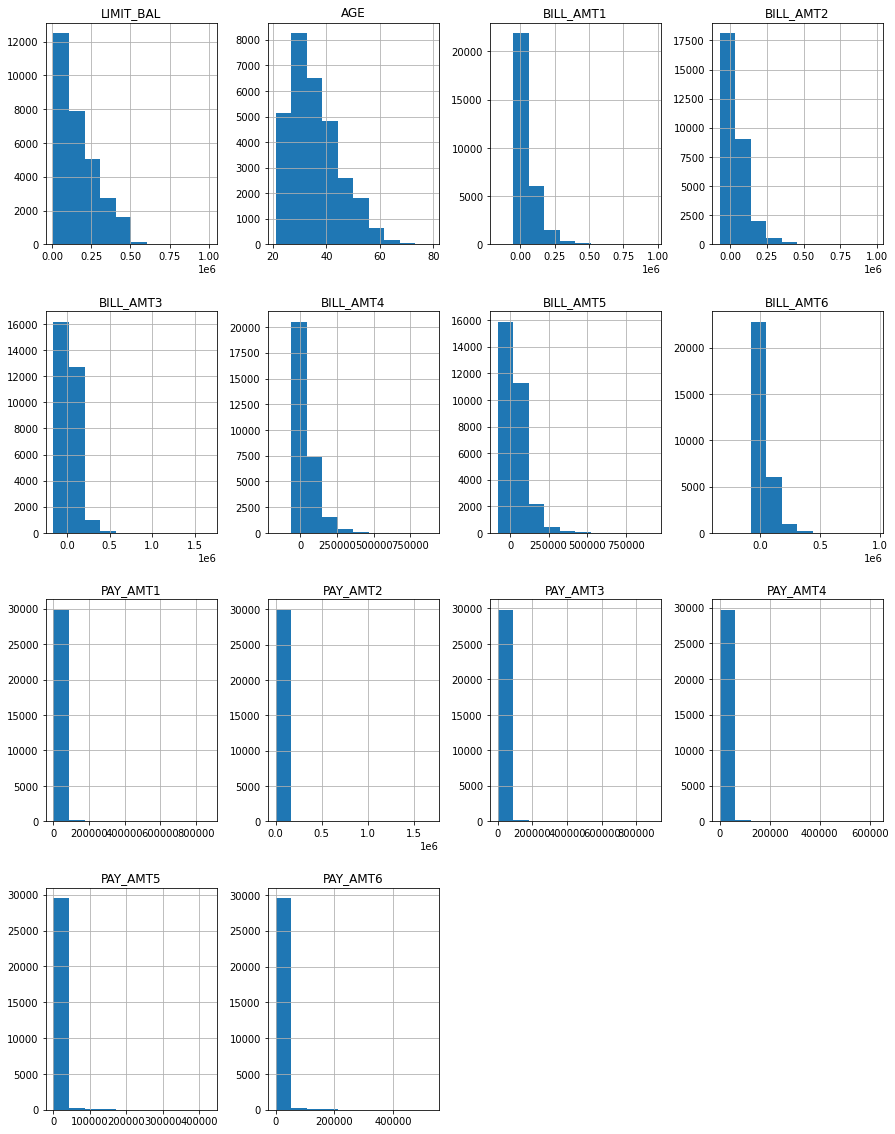

In [133]:
numerical_cols.hist(figsize = (15,20))
plt.show()

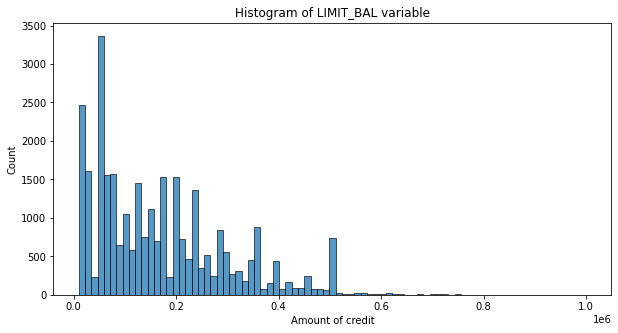

In [140]:
plt.subplots(figsize=(10,5))
plt.title('Histogram of LIMIT_BAL variable')
plt.xlabel('Amount of credit')
sns.histplot(cc_df.LIMIT_BAL)
plt.show()

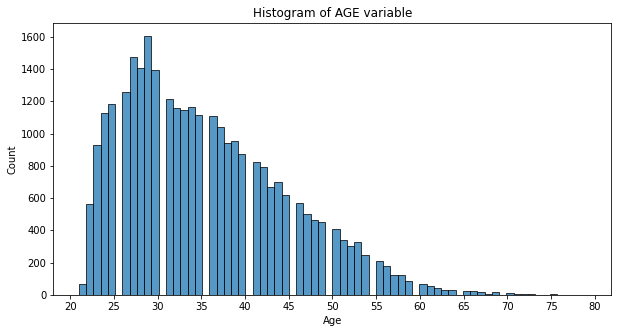

In [142]:
x = np.random.randint(low=0, high=80, size=100)
plt.subplots(figsize=(10,5))
plt.title('Histogram of AGE variable')
plt.xlabel('Age')
plt.xticks(np.arange(0, len(x)+1, 5))
sns.histplot(cc_df.AGE)
plt.show()

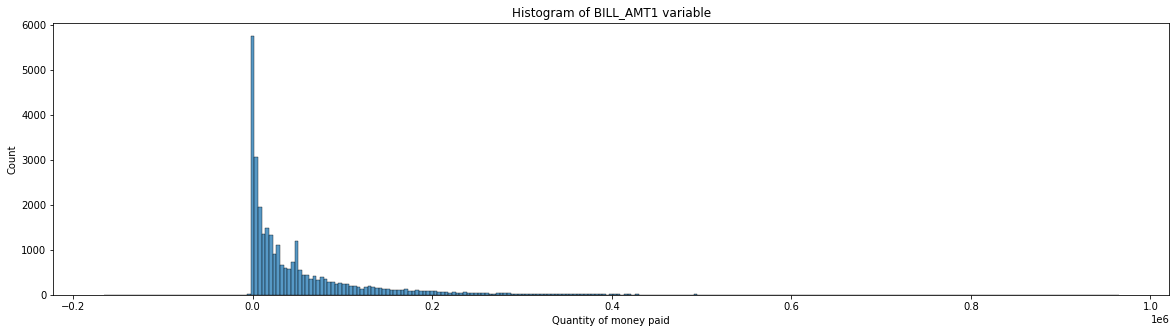

In [156]:
plt.subplots(figsize=(20,5))
plt.title('Histogram of BILL_AMT1 variable')
plt.xlabel('Quantity of money paid')
sns.histplot(cc_df.BILL_AMT1)
plt.show()

#### Correlation matrix

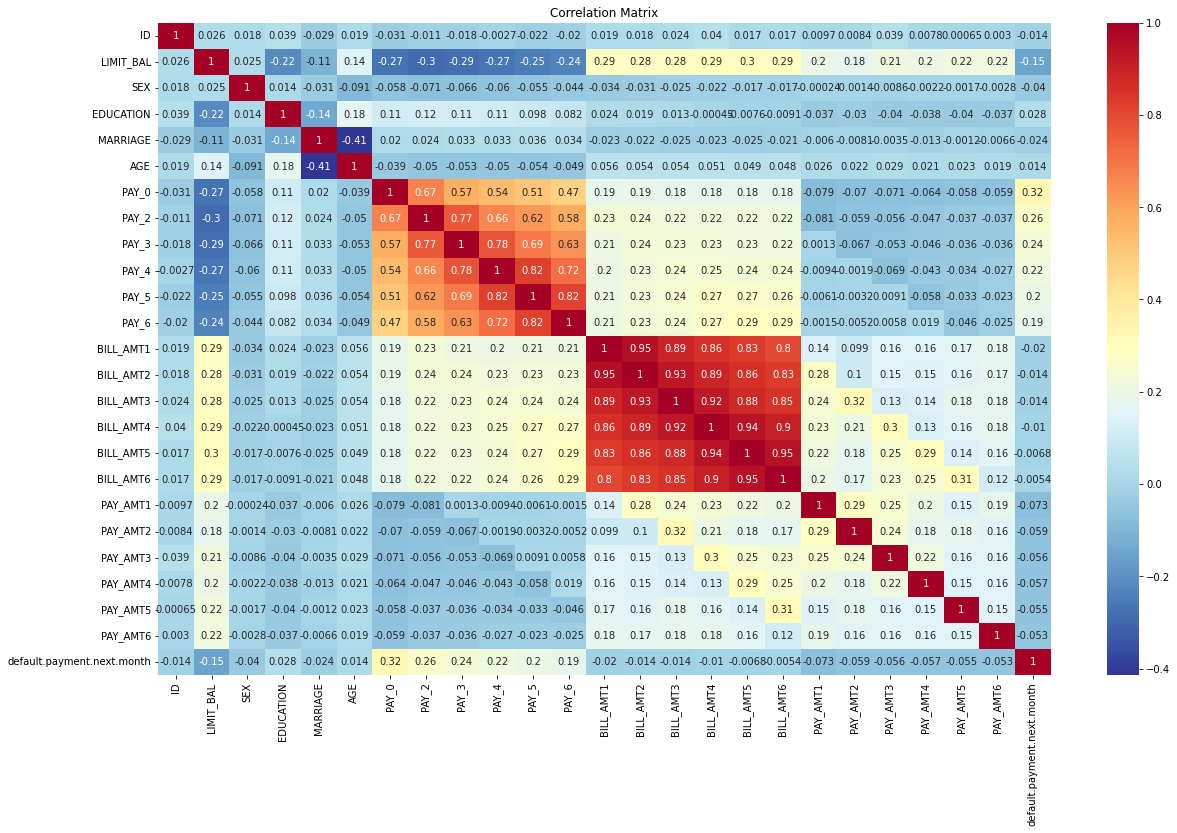

In [164]:
corr_mat = cc_df.corr()
plt.figure(figsize = [20,12])
sns.heatmap(corr_mat, annot = True, cmap = 'RdYlBu_r')
plt.title('Correlation Matrix')
plt.show()

### Data cleaning

In [194]:
# Rename column PAY_0 to PAY_1
# Follow the same order as BILL_AMT and PAY_AMT
cc_df = cc_df.rename(columns={'PAY_0': 'PAY_1'})

In [195]:
# Rename column default.payment.next.month to payment
cc_df = cc_df.rename(columns={'default.payment.next.month': 'default'})
print(f'Column names are :', list(cc_df.columns))

Column names are : ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default']


In [196]:
# Column ID is no needed
cc_df = cc_df.drop(axis=1, columns='ID')

#### EDUCATION variable

From Data Description, that in column EDUCATION, 0, 5 and 6 represents "unknown"

In [197]:
# Description of values
summary = cc_df.EDUCATION.value_counts()
print(summary)

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


In [198]:
# Delete 0, 5 and 6
m = (cc_df.EDUCATION == 0)|(cc_df.EDUCATION == 6)|(cc_df.EDUCATION == 5)
cc_df = cc_df.drop(cc_df.EDUCATION[m].index.values, axis=0)
print(f'Unique values of Education columns are:',np.unique(cc_df.EDUCATION))

Unique values of Education columns are: [1 2 3 4]


#### MARRIAGE variable

From Data Description, in column MARRIAGE, rows with 0 value does not exists. I will proceed to delete them 

In [199]:
# Description of values
summary = cc_df.MARRIAGE.value_counts()
print(summary)

2    15806
1    13477
3      318
0       54
Name: MARRIAGE, dtype: int64


In [200]:
m = (cc_df.MARRIAGE == 0)
cc_df = cc_df.drop(cc_df.MARRIAGE[m].index.values, axis=0)
print(f'Unique values of Education columns are:',np.unique(cc_df.MARRIAGE))

Unique values of Education columns are: [1 2 3]


In total 399 rows; 345 (280 + 51 + 14) elements of EDUCATION  and 54 of MARRIAGE were deleted. This value represents 1.33% of the whole dataset.

### Data management

#### Rescaling variable PAY

In [201]:
cc_df[['PAY_' + str(n) for n in range(1, 7)]].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,-0.014932,-0.131313,-0.163440,-0.218303,-0.263978,-0.287558
std,1.124503,1.199642,1.199793,1.172220,1.136217,1.152206
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


All of this attributes have a minimum value equal to -2, not included in the ranking. Maximum value is equal to 8. 
I will try changing the scale of the values.

In [202]:
cc_df[['PAY_' + str(n) for n in range(1, 7)]] += 1
cc_df[['PAY_' + str(n) for n in range(1, 7)]].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,0.985068,0.868687,0.836560,0.781697,0.736022,0.712442
std,1.124503,1.199642,1.199793,1.172220,1.136217,1.152206
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


#### One-hot encondig

EDUCATION, SEX and MARRIAGE variables include categories. 

In [203]:
cc_df.EDUCATION = cc_df.EDUCATION.astype('category')
cc_df.SEX = cc_df.SEX.astype('category')
cc_df.MARRIAGE = cc_df.MARRIAGE.astype('category')

In [204]:
cc_df=pd.concat([pd.get_dummies(cc_df.EDUCATION, prefix='EDUCATION'),
                  pd.get_dummies(cc_df.SEX, prefix='SEX'),
                  pd.get_dummies(cc_df.MARRIAGE, prefix='MARRIAGE'),
                  cc_df],axis=1)

In [205]:
cc_df.drop(['EDUCATION'],axis=1, inplace=True)
cc_df.drop(['SEX'],axis=1, inplace=True)
cc_df.drop(['MARRIAGE'],axis=1, inplace=True)
print(f'Column names are :', list(cc_df.columns))

Column names are : ['EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'SEX_1', 'SEX_2', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default']


### Transformation of variables

In [206]:
from sklearn.preprocessing import MinMaxScaler

#### Use MinMaxScaler Transform 

In [207]:
# Call MinMaxScaler instance
trans = MinMaxScaler()

In [208]:
# Create a copy of preprocessed data
mms_cp = cc_df
mms_cp.head()

,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,LIMIT_BAL,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,0,1,0,0,0,1,1,0,0,20000.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,0,1,0,0,0,1,0,1,0,120000.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,0,1,0,0,0,1,0,1,0,90000.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,0,1,0,0,0,1,1,0,0,50000.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,0,1,0,0,1,0,1,0,0,50000.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


#### Transform numerical variables

In [209]:
mms_cp.LIMIT_BAL = trans.fit_transform(mms_cp.LIMIT_BAL.values.reshape(-1, 1))
mms_cp.AGE = trans.fit_transform(mms_cp.AGE.values.reshape(-1, 1))

In [210]:
for i in range(1,7):
    scaler = MinMaxScaler()
    mms_cp['BILL_AMT' + str(i)] = scaler.fit_transform(mms_cp['BILL_AMT' + str(i)].values.reshape(-1, 1))

for i in range(1,7):
    scaler = MinMaxScaler()
    mms_cp['PAY_AMT' + str(i)] = scaler.fit_transform(mms_cp['PAY_AMT' + str(i)].values.reshape(-1, 1))

'''
for i in range(1,7):
    scaler = MinMaxScaler()
    mms_cp['PAY_' + str(i)] = scaler.fit_transform(mms_cp['PAY_' + str(i)].values.reshape(-1, 1))
'''

"\nfor i in range(1,7):\n    scaler = MinMaxScaler()\n    mms_cp['PAY_' + str(i)] = scaler.fit_transform(mms_cp['PAY_' + str(i)].values.reshape(-1, 1))\n"

#### Graphical analysis after transform

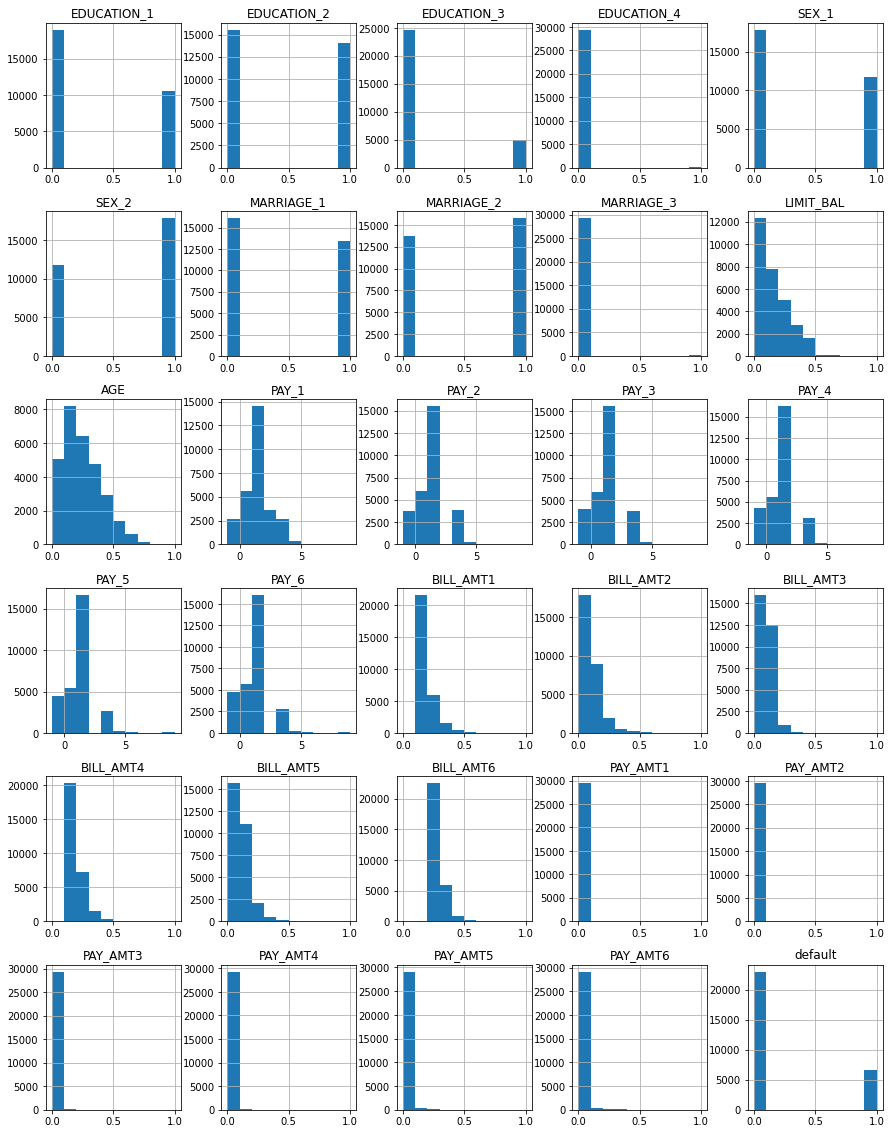

In [211]:
mms_cp.hist(figsize = (15,20))
plt.show()

#### Count Outliers

Four automatic outlier detection algorithms are going to be used

In [23]:
# Isolation forest
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest()
is_outliers = isolation_forest.fit_predict(X0_train)

In [24]:
from sklearn.svm import OneClassSVM
nu=0.1
one_class_svm = OneClassSVM(nu = nu, kernel='poly')
ocsvm_outliers = one_class_svm.fit_predict(X0_train)

In [25]:
from sklearn.svm import OneClassSVM
nu=0.2
one_class_svm = OneClassSVM(nu=nu)
svdd_outliers = one_class_svm.fit_predict(X0_train)

In [26]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=200)
lof_outliers = lof.fit_predict(X0_train)

In [27]:
num_is_outliers = len(np.where(is_outliers == -1)[0])
num_oc_outliers = len(np.where(ocsvm_outliers == -1)[0])
num_svdd_outliers = len(np.where(svdd_outliers == -1)[0])
num_lof_outliers = len(np.where(lof_outliers == -1)[0])

In [28]:
print('Outliers with Isolation Forest:', num_is_outliers)
print('Outliers with One Class SVM:', num_oc_outliers)
print('Outliers with LOF:', num_lof_outliers)
print('Outliers with SVMDD:',num_svdd_outliers)

Outliers with Isolation Forest: 1904
Outliers with One Class SVM: 2222
Outliers with LOF: 3885
Outliers with SVMDD: 4438


In [29]:
#mask = (is_outliers == -1)&(ocsvm_outliers == -1)&(lof_outliers == -1)
outliers = (is_outliers == -1)&(ocsvm_outliers == -1)&(lof_outliers == -1)&(svdd_outliers == -1)
common_outlier = np.sum(outliers)
print('The previous algorithms indentify:', common_outlier,  'outliers in common.')

The previous algorithms indentify: 106 outliers in common.


In [30]:
# Outliers to delete
mask = (svdd_outliers == -1)
print(np.sum(mask))

4438


In [31]:
print(X0_train.shape, Y0_train.shape)
X0_train.drop(X0_train[mask].index, axis=0, inplace=True)
Y0_train.drop(Y0_train[mask].index, axis=0, inplace=True)
print(X0_train.shape, Y0_train.shape)


(22200, 29) (22200,)
(17762, 29) (17762,)


#### Data without outliers

<AxesSubplot:>

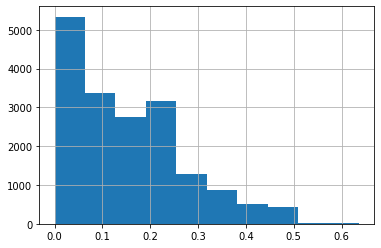

In [192]:
X0_train.LIMIT_BAL.hist()

<AxesSubplot:xlabel='SEX_2', ylabel='LIMIT_BAL'>

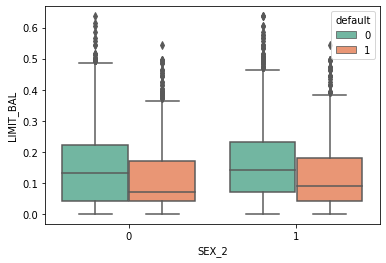

In [76]:
sns.boxplot(x= X0_train.SEX_2,
            y = X0_train.LIMIT_BAL,
            hue = Y0_train,
            palette = 'Set2')

In [90]:
sns.catplot(x=X0_train.EDUCATION_1, y=X0_train.LIMIT_BAL,
            hue =Y0_train, col ='PAY_1',
            data=cc_df, kind="box",
            height=5, aspect=0.7)

KeyError: "None of [Float64Index([                0.2,                 0.0, 0.30000000000000004,\n                              0.1,                 0.1,                 0.2,\n                              0.2,                 0.2,                 0.2,\n                              0.1,\n              ...\n              0.30000000000000004,                 0.2,                 0.1,\n                              0.2,                 0.2,                 0.1,\n                              0.2,                 0.2,                 0.1,\n                              0.2],\n             dtype='float64', length=17762)] are in the [columns]"

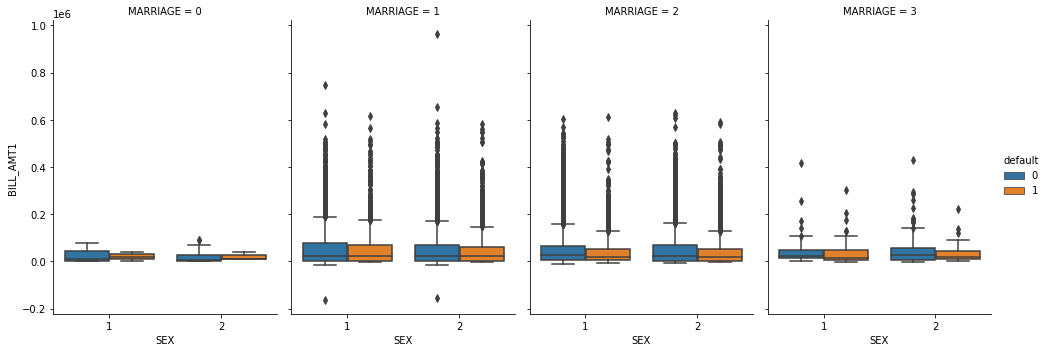

In [60]:
sns.catplot(x='SEX', y='BILL_AMT1',
            hue ='default', col ='MARRIAGE',
            data=cc_df, kind="box",
            height=5, aspect=0.7)

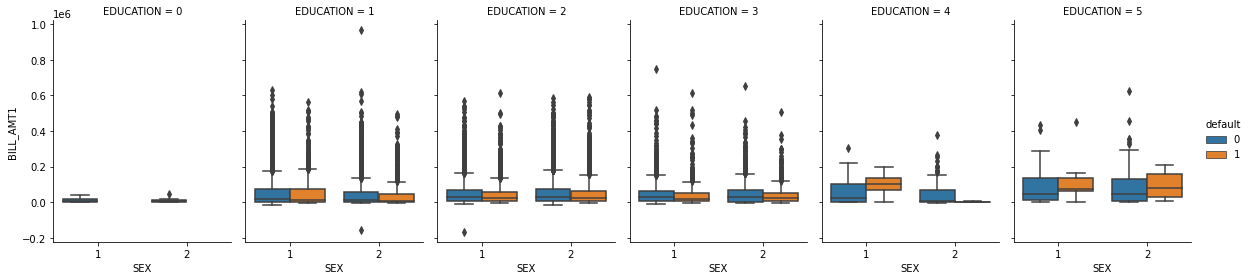

In [53]:
sns.catplot(x='SEX', y='BILL_AMT1',
            hue ='default', col ='EDUCATION',
            data=cc_df, kind="box",
            height=4, aspect=0.7)

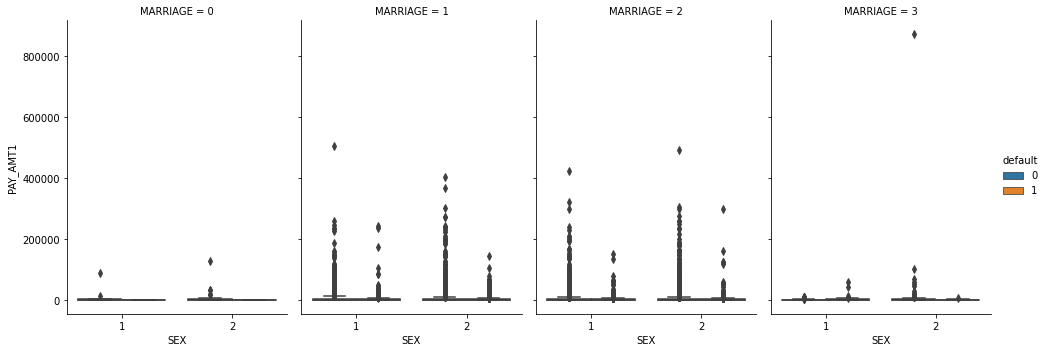

In [65]:
sns.catplot(x='SEX', y='PAY_AMT1',
            hue ='default', col ='MARRIAGE',
            data=cc_df, kind="box",
            height=5, aspect=0.7)

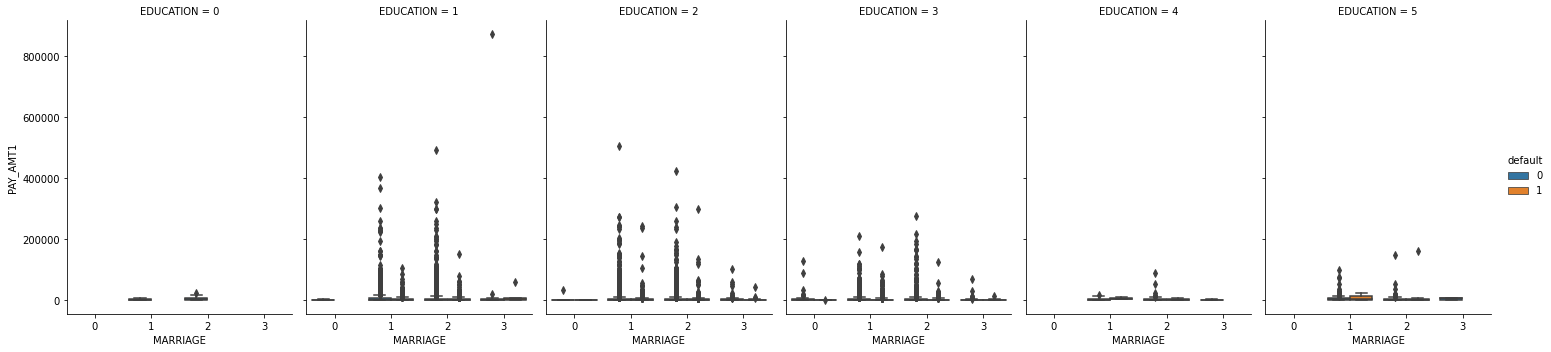

In [71]:
sns.catplot(x='MARRIAGE', y='PAY_AMT1',
            hue ='default', col ='EDUCATION',
            data=cc_df, kind="box",
            height=5, aspect=0.7)

##### Test and Train partition

In [21]:
X0 = cpr_df.drop(['default'], axis=1)
Y0 = cpr_df.default
X0.head()
#Y0.head()

,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,LIMIT_BAL,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0,1,0,0,0,1,1,0,0,0.010101,...,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,0,1,0,0,0,1,0,1,0,0.111111,...,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,0,1,0,0,0,1,0,1,0,0.080808,...,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,0,1,0,0,0,1,1,0,0,0.040404,...,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,0,1,0,0,1,0,1,0,0,0.040404,...,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284


In [22]:
X0_train, X0_test, Y0_train, Y0_test = train_test_split(X0, Y0, test_size=0.25, random_state=10)
print(X0_train.shape, Y0_train.shape)
print(X0_test.shape, Y0_test.shape)

(22200, 29) (22200,)
(7401, 29) (7401,)


### Modeling stage

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from numpy import mean
from numpy import std

##### k-Nearest Neighbor

In [33]:
model = KNeighborsClassifier(n_neighbors=3, weights='distance')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, X0_train, Y0_train, scoring='accuracy', cv=cv, n_jobs=-1)   
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.788 (0.011)


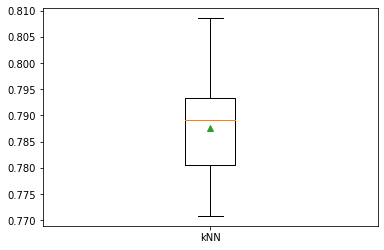

In [34]:
plt.boxplot(scores, labels=['kNN'], showmeans=True)
plt.show()

In [35]:
recall = cross_val_score(model, X0_train, Y0_train, scoring='recall', cv=cv, n_jobs=-1)   
print('Recall: %.3f (%.3f)' % (mean(recall), std(recall)))

Recall: 0.276 (0.023)


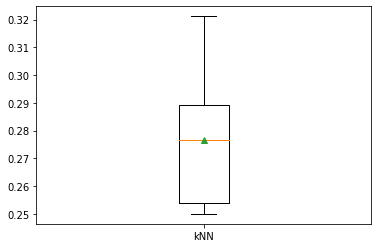

In [36]:
plt.boxplot(recall, labels=['kNN'], showmeans=True)
plt.show()

In [37]:
f1 = cross_val_score(model, X0_train, Y0_train, scoring='f1', cv=cv, n_jobs=-1)   
print('f1-score: %.3f (%.3f)' % (mean(f1), std(f1)))
auc = cross_val_score(model, X0_train, Y0_train, scoring='roc_auc', cv=cv, n_jobs=-1)   
print('ROC-AUC: %.3f (%.3f)' % (mean(auc), std(auc)))

f1-score: 0.329 (0.022)
ROC-AUC: 0.642 (0.016)


In [38]:
model.fit(X0_train, Y0_train)
Y0_pred = model.predict(X0_test)
print(confusion_matrix(Y0_test, Y0_pred))

[[5099  642]
 [1092  568]]


In [39]:
print(classification_report(Y0_test, Y0_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      5741
           1       0.47      0.34      0.40      1660

    accuracy                           0.77      7401
   macro avg       0.65      0.62      0.63      7401
weighted avg       0.74      0.77      0.75      7401



In [40]:
# Keep probabilities for the positive outcome only
yhat = model.predict_proba(X0_test)
pos_probs = yhat[:,1]

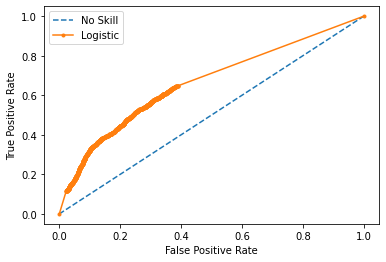

In [41]:
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(Y0_test, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [42]:
from sklearn.inspection import permutation_importance
results = permutation_importance(model, X0_train, Y0_train, scoring='accuracy')
importance = results.importances_mean

In [43]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.05746
Feature: 1, Score: 0.06271
Feature: 2, Score: 0.02996
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.05990
Feature: 5, Score: 0.05990
Feature: 6, Score: 0.06166
Feature: 7, Score: 0.06166
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.13362
Feature: 10, Score: 0.15880
Feature: 11, Score: 0.13468
Feature: 12, Score: 0.11033
Feature: 13, Score: 0.09592
Feature: 14, Score: 0.08999
Feature: 15, Score: 0.08464
Feature: 16, Score: 0.09606
Feature: 17, Score: 0.06502
Feature: 18, Score: 0.06756
Feature: 19, Score: 0.04163
Feature: 20, Score: 0.05881
Feature: 21, Score: 0.05827
Feature: 22, Score: 0.04495
Feature: 23, Score: 0.00605
Feature: 24, Score: 0.00267
Feature: 25, Score: 0.00626
Feature: 26, Score: 0.00913
Feature: 27, Score: 0.01314
Feature: 28, Score: 0.01228


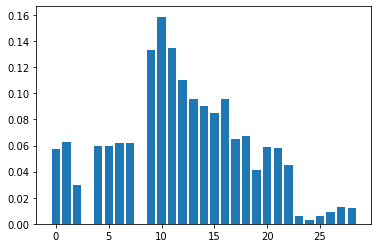

In [44]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

##### Logistic Regression (LR)

In [58]:
model = LogisticRegression(solver='lbfgs')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, X0_train, Y0_train, scoring='accuracy', cv=cv, n_jobs=-1)   
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

/home/suelo/Desktop/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/suelo/Desktop/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Accuracy: 0.824 (0.011)


/home/suelo/Desktop/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/suelo/Desktop/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

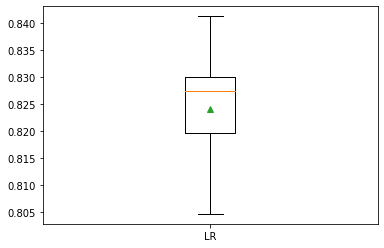

In [59]:
plt.boxplot(scores, labels=['LR'], showmeans=True)
plt.show()

In [60]:
recall = cross_val_score(model, X0_train, Y0_train, scoring='recall', cv=cv, n_jobs=-1)   
print('Recall: %.3f (%.3f)' % (mean(recall), std(recall)))

/home/suelo/Desktop/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/suelo/Desktop/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

Recall: 0.124 (0.011)


/home/suelo/Desktop/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


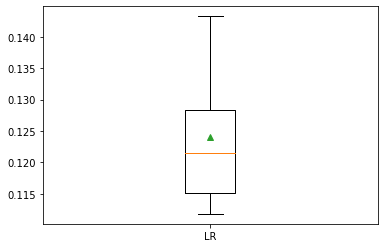

In [61]:
plt.boxplot(recall, labels=['LR'], showmeans=True)
plt.show()

In [62]:
f1 = cross_val_score(model, X0_train, Y0_train, scoring='f1', cv=cv, n_jobs=-1)   
print('f1-score: %.3f (%.3f)' % (mean(f1), std(f1)))
auc = cross_val_score(model, X0_train, Y0_train, scoring='roc_auc', cv=cv, n_jobs=-1)   
print('ROC-AUC: %.3f (%.3f)' % (mean(auc), std(auc)))

/home/suelo/Desktop/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/suelo/Desktop/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

f1-score: 0.210 (0.015)


/home/suelo/Desktop/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/suelo/Desktop/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

ROC-AUC: 0.693 (0.017)


In [63]:
model.fit(X0_train, Y0_train)
Y0_pred = model.predict(X0_test)
print(confusion_matrix(Y0_test, Y0_pred))

[[5599  142]
 [1306  354]]


/home/suelo/Desktop/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
print(classification_report(Y0_test, Y0_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      5741
           1       0.71      0.21      0.33      1660

    accuracy                           0.80      7401
   macro avg       0.76      0.59      0.61      7401
weighted avg       0.79      0.80      0.76      7401



In [65]:
# Keep probabilities for the positive outcome only
yhat = model.predict_proba(X0_test)
pos_probs = yhat[:,1]

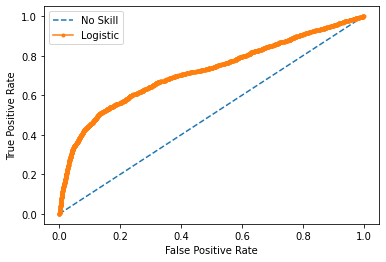

In [66]:
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(Y0_test, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [67]:
importance = model.coef_[0]

In [68]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01753
Feature: 1, Score: -0.06641
Feature: 2, Score: -0.26582
Feature: 3, Score: 0.00000
Feature: 4, Score: -0.12185
Feature: 5, Score: -0.19285
Feature: 6, Score: -0.04818
Feature: 7, Score: -0.26652
Feature: 8, Score: 0.00000
Feature: 9, Score: -1.88799
Feature: 10, Score: 0.38945
Feature: 11, Score: 6.19871
Feature: 12, Score: 1.27889
Feature: 13, Score: 1.01394
Feature: 14, Score: 0.02503
Feature: 15, Score: 0.34928
Feature: 16, Score: -0.64709
Feature: 17, Score: -2.20626
Feature: 18, Score: -0.63478
Feature: 19, Score: -0.46922
Feature: 20, Score: -0.48931
Feature: 21, Score: -0.43737
Feature: 22, Score: 0.14704
Feature: 23, Score: -2.14777
Feature: 24, Score: -1.76192
Feature: 25, Score: -1.17920
Feature: 26, Score: -1.15197
Feature: 27, Score: -1.52636
Feature: 28, Score: -1.51996


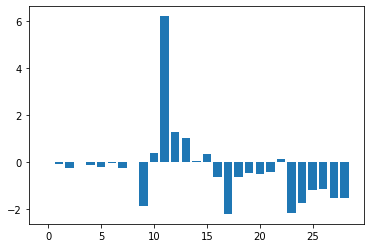

In [69]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

##### Support Vector Machine (SVM)

In [110]:
#model = SVC(class_weight='balanced')
model = SVC()
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, X0_train, Y0_train, scoring='accuracy', cv=cv, n_jobs=-1)   
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

KeyboardInterrupt: 

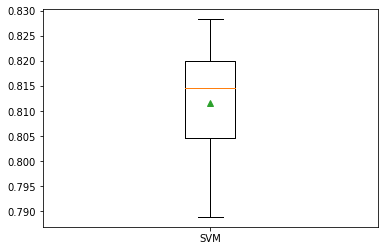

In [106]:
plt.boxplot(scores, labels=['SVM'], showmeans=True)
plt.show()

In [107]:
recall = cross_val_score(model, X0_train, Y0_train, scoring='recall', cv=cv, n_jobs=-1)   
print('Recall: %.3f (%.3f)' % (mean(recall), std(recall)))

Recall: 0.000 (0.000)


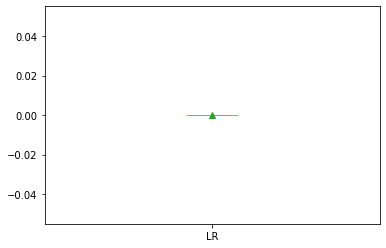

In [108]:
plt.boxplot(recall, labels=['LR'], showmeans=True)
plt.show()

In [109]:
f1 = cross_val_score(model, X0_train, Y0_train, scoring='f1', cv=cv, n_jobs=-1)   
print('f1-score: %.3f (%.3f)' % (mean(f1), std(f1)))
auc = cross_val_score(model, X0_train, Y0_train, scoring='roc_auc', cv=cv, n_jobs=-1)   
print('ROC-AUC: %.3f (%.3f)' % (mean(auc), std(auc)))

KeyboardInterrupt: 

In [111]:
model.fit(X0_train, Y0_train)
Y0_pred = model.predict(X0_test)
print(confusion_matrix(Y0_test, Y0_pred))

[[5678   63]
 [1489  171]]


In [112]:
print(classification_report(Y0_test, Y0_pred))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      5741
           1       0.73      0.10      0.18      1660

    accuracy                           0.79      7401
   macro avg       0.76      0.55      0.53      7401
weighted avg       0.78      0.79      0.72      7401



In [95]:
# Keep probabilities for the positive outcome only
yhat = model.predict_proba(X0_test)
pos_probs = yhat[:,1]

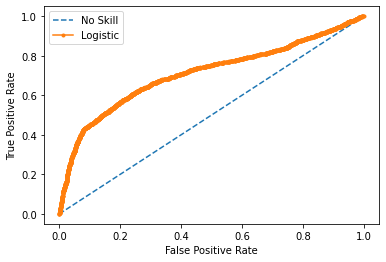

In [96]:
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(Y0_test, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [115]:
importance = model.n_features_in_

In [116]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

TypeError: 'int' object is not iterable

In [117]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

TypeError: object of type 'int' has no len()

##### Multi-layer Perceptron Classifier

In [45]:
model = MLPClassifier(hidden_layer_sizes=(4,),activation="relu",random_state=1, solver='adam')
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, X0_train, Y0_train, scoring='accuracy', cv=cv, n_jobs=-1)   
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.826 (0.011)


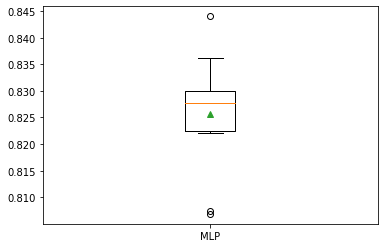

In [46]:
plt.boxplot(scores, labels=['MLP'], showmeans=True)
plt.show()

In [47]:
recall = cross_val_score(model, X0_train, Y0_train, scoring='recall', cv=cv, n_jobs=-1)   
print('Recall: %.3f (%.3f)' % (mean(recall), std(recall)))

Recall: 0.136 (0.012)


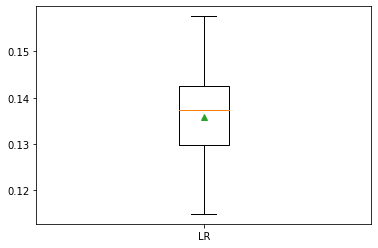

In [48]:
plt.boxplot(recall, labels=['LR'], showmeans=True)
plt.show()

In [49]:
f1 = cross_val_score(model, X0_train, Y0_train, scoring='f1', cv=cv, n_jobs=-1)   
print('f1-score: %.3f (%.3f)' % (mean(f1), std(f1)))
auc = cross_val_score(model, X0_train, Y0_train, scoring='roc_auc', cv=cv, n_jobs=-1)   
print('ROC-AUC: %.3f (%.3f)' % (mean(auc), std(auc)))

f1-score: 0.227 (0.017)
ROC-AUC: 0.696 (0.017)


In [50]:
model.fit(X0_train, Y0_train)
Y0_pred = model.predict(X0_test)
print(confusion_matrix(Y0_test, Y0_pred))

[[5593  148]
 [1280  380]]


In [51]:
print(classification_report(Y0_test, Y0_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.89      5741
           1       0.72      0.23      0.35      1660

    accuracy                           0.81      7401
   macro avg       0.77      0.60      0.62      7401
weighted avg       0.79      0.81      0.77      7401



In [52]:
yhat = model.predict_proba(X0_test)
pos_probs = yhat[:,1]

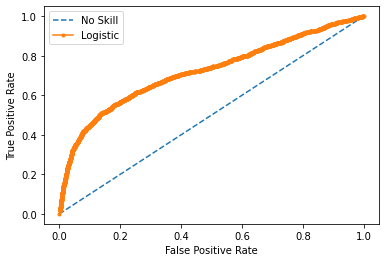

In [53]:
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(Y0_test, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

##### Decision tree classifier

In [55]:
model = DecisionTreeClassifier()
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(model, X0_train, Y0_train, scoring='accuracy', cv=cv, n_jobs=-1)   
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.741 (0.009)


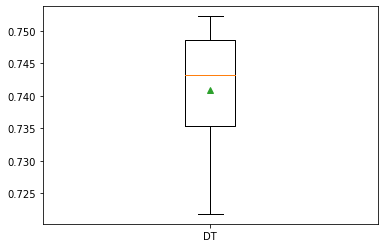

In [56]:
plt.boxplot(scores, labels=['DT'], showmeans=True)
plt.show()

In [57]:
rll = cross_val_score(model, X0_train, Y0_train, scoring='recall', cv=cv, n_jobs=-1)   
print('Recall: %.3f (%.3f)' % (mean(rll), std(rll)))

Recall: 0.358 (0.029)


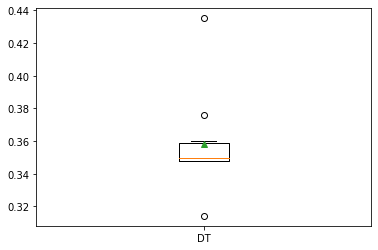

In [62]:
plt.boxplot(rll, labels=['DT'], showmeans=True)
plt.show()

In [59]:
f1 = cross_val_score(model, X0_train, Y0_train, scoring='f1', cv=cv, n_jobs=-1)   
print('f1-score: %.3f (%.3f)' % (mean(f1), std(f1)))
auc = cross_val_score(model, X0_train, Y0_train, scoring='roc_auc', cv=cv, n_jobs=-1)   
print('ROC-AUC: %.3f (%.3f)' % (mean(auc), std(auc)))

f1-score: 0.346 (0.030)
ROC-AUC: 0.596 (0.014)


In [60]:
model.fit(X0_train, Y0_train)
Y0_pred = model.predict(X0_test)
print(confusion_matrix(Y0_test, Y0_pred))

[[4585 1156]
 [ 987  673]]


In [61]:
print(classification_report(Y0_test, Y0_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      5741
           1       0.37      0.41      0.39      1660

    accuracy                           0.71      7401
   macro avg       0.60      0.60      0.60      7401
weighted avg       0.72      0.71      0.72      7401



In [63]:
yhat = model.predict_proba(X0_test)
pos_probs = yhat[:,1]

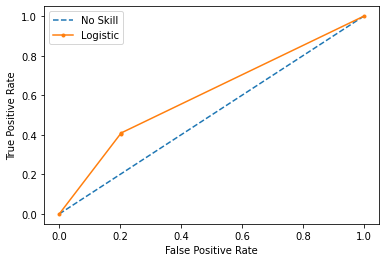

In [64]:
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(Y0_test, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [65]:
importance = model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00790
Feature: 1, Score: 0.01042
Feature: 2, Score: 0.00547
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00907
Feature: 5, Score: 0.00835
Feature: 6, Score: 0.00640
Feature: 7, Score: 0.00576
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.05570
Feature: 10, Score: 0.07034
Feature: 11, Score: 0.12562
Feature: 12, Score: 0.02800
Feature: 13, Score: 0.01121
Feature: 14, Score: 0.00789
Feature: 15, Score: 0.00512
Feature: 16, Score: 0.00925
Feature: 17, Score: 0.07352
Feature: 18, Score: 0.04767
Feature: 19, Score: 0.04875
Feature: 20, Score: 0.04708
Feature: 21, Score: 0.05554
Feature: 22, Score: 0.05342
Feature: 23, Score: 0.04528
Feature: 24, Score: 0.05619
Feature: 25, Score: 0.05645
Feature: 26, Score: 0.04445
Feature: 27, Score: 0.04654
Feature: 28, Score: 0.05861


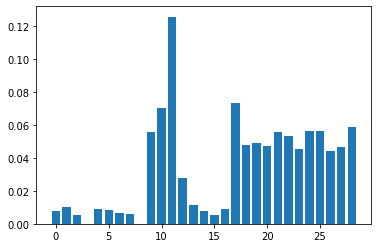

In [66]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

##### Random Forest

In [67]:
model = RandomForestClassifier()
cv = KFold(n_splits=10, random_state=1, shuffle=True)
acc = cross_val_score(model, X0_train, Y0_train, scoring='accuracy', cv=cv, n_jobs=-1)   

print('Accuracy: %.3f (%.3f)' % (mean(acc), std(acc)))

Accuracy: 0.833 (0.011)


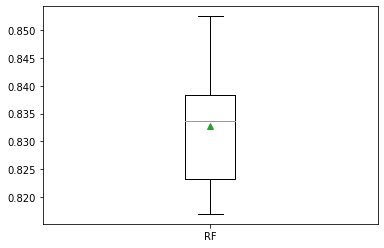

In [68]:
plt.boxplot(acc, labels=['RF'], showmeans=True)
plt.show()

In [69]:
rll = cross_val_score(model, X0_train, Y0_train, scoring='recall', cv=cv, n_jobs=-1)   
print('Recall: %.3f (%.3f)' % (mean(rll), std(rll)))

Recall: 0.265 (0.020)


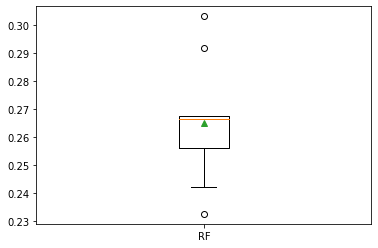

In [70]:
plt.boxplot(rll, labels=['RF'], showmeans=True)
plt.show()

In [71]:
f1 = cross_val_score(model, X0_train, Y0_train, scoring='f1', cv=cv, n_jobs=-1)   
print('f1-score: %.3f (%.3f)' % (mean(f1), std(f1)))
auc = cross_val_score(model, X0_train, Y0_train, scoring='roc_auc', cv=cv, n_jobs=-1)   
print('ROC-AUC: %.3f (%.3f)' % (mean(auc), std(auc)))

f1-score: 0.370 (0.021)
ROC-AUC: 0.737 (0.010)


In [72]:
model.fit(X0_train, Y0_train)
Y0_pred = model.predict(X0_test)
print(confusion_matrix(Y0_test, Y0_pred))

[[5430  311]
 [1083  577]]


In [73]:
print(classification_report(Y0_test, Y0_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5741
           1       0.65      0.35      0.45      1660

    accuracy                           0.81      7401
   macro avg       0.74      0.65      0.67      7401
weighted avg       0.79      0.81      0.79      7401



In [74]:
yhat = model.predict_proba(X0_test)
pos_probs = yhat[:,1]

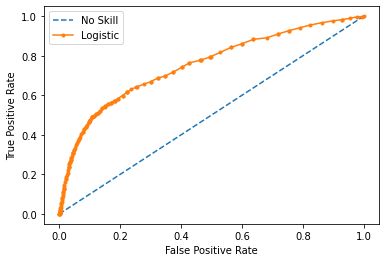

In [75]:
# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(Y0_test, pos_probs)
# plot model roc curve
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [76]:
importance = model.feature_importances_

In [77]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00837
Feature: 1, Score: 0.00912
Feature: 2, Score: 0.00613
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00854
Feature: 5, Score: 0.00843
Feature: 6, Score: 0.00869
Feature: 7, Score: 0.00854
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.05813
Feature: 10, Score: 0.06215
Feature: 11, Score: 0.09192
Feature: 12, Score: 0.03495
Feature: 13, Score: 0.01863
Feature: 14, Score: 0.01372
Feature: 15, Score: 0.01296
Feature: 16, Score: 0.01194
Feature: 17, Score: 0.06347
Feature: 18, Score: 0.05722
Feature: 19, Score: 0.05545
Feature: 20, Score: 0.05423
Feature: 21, Score: 0.05317
Feature: 22, Score: 0.05438
Feature: 23, Score: 0.05356
Feature: 24, Score: 0.05266
Feature: 25, Score: 0.05027
Feature: 26, Score: 0.04774
Feature: 27, Score: 0.04663
Feature: 28, Score: 0.04897


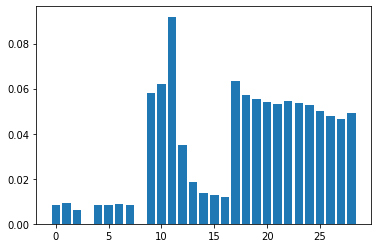

In [78]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()